In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor

In [2]:
df=pd.read_csv('D:\Coding_Project\Python_MeachingLearning_HousePrice\Data\網路爬蟲_勤美之森實價登錄資訊.csv')
df

,num,transaction_date,address,floor,total_floor,total_price,unit_price_ping,total_area_ping,house_area_ping,land_area_ping,total_parking_price,parking_amount,per_parking_price
0,1,111/01,B3,23,32,4688,52.44,100.86,79.86,9.02,500,2,250.0
1,2,110/12,A2,14,35,5630,55.38,116.71,95.70,10.56,330,2,165.0
2,3,110/12,A1,13,35,5058,52.40,110.33,90.33,10.12,325,2,162.5
3,4,110/12,B1,22,32,5656,53.83,124.60,93.10,10.56,645,3,215.0
4,5,110/12,A2,23,35,6528,62.95,116.60,95.60,10.56,510,2,255.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,139,108/07,B2,12,32,5090,50.57,113.74,92.74,10.34,400,2,200.0
139,140,108/07,A2,29,35,6728,62.43,127.10,95.60,10.78,760,3,253.3
140,141,108/07,A2,8,35,5689,53.07,127.20,95.70,10.78,610,3,203.3
141,142,108/07,A3,8,35,4265,47.95,102.86,81.86,9.24,340,2,170.0


In [3]:
df_clean=df.copy()

In [4]:
df_clean=df_clean.drop(['num'],axis=1).drop(['transaction_date'],axis=1).drop(['total_parking_price'],axis=1).drop(['parking_amount'],axis=1).drop(['per_parking_price'],axis=1).drop(['total_price'],axis=1).drop(['total_floor'],axis=1).drop(['house_area_ping'],axis=1).drop(['land_area_ping'],axis=1)
df_clean

,address,floor,unit_price_ping,total_area_ping
0,B3,23,52.44,100.86
1,A2,14,55.38,116.71
2,A1,13,52.40,110.33
3,B1,22,53.83,124.60
4,A2,23,62.95,116.60
...,...,...,...,...
138,B2,12,50.57,113.74
139,A2,29,62.43,127.10
140,A2,8,53.07,127.20
141,A3,8,47.95,102.86


In [5]:
df_clean['address'].value_counts()

A2    30
B3    23
B2    19
A5    19
A3    18
A1    17
B1    17
Name: address, dtype: int64

In [6]:
d={'A1':8,'A2':7, 'A3':6, 'A4':5, 'A5':4, 'B1':3, 'B2':2, 'B3':1}

In [7]:
df_clean['address']=df_clean['address'].map(d)
df_clean

,address,floor,unit_price_ping,total_area_ping
0,1,23,52.44,100.86
1,7,14,55.38,116.71
2,8,13,52.40,110.33
3,3,22,53.83,124.60
4,7,23,62.95,116.60
...,...,...,...,...
138,2,12,50.57,113.74
139,7,29,62.43,127.10
140,7,8,53.07,127.20
141,6,8,47.95,102.86


In [8]:
df_clean.insert(0, 'id', range(1, 1 + len(df_clean)))

In [78]:
df_clean

,id,address,floor,unit_price_ping,total_area_ping
0,1,1,23,52.44,100.86
1,2,7,14,55.38,116.71
2,3,8,13,52.40,110.33
3,4,3,22,53.83,124.60
4,5,7,23,62.95,116.60
...,...,...,...,...,...
138,139,2,12,50.57,113.74
139,140,7,29,62.43,127.10
140,141,7,8,53.07,127.20
141,142,6,8,47.95,102.86


In [9]:
over_hotel_floor=pd.DataFrame(columns=['over_hotel_floor'])
df_clean=pd.concat([df_clean,over_hotel_floor])
for i in df_clean.index:
    value=df_clean['floor'][i]
    if value >= 16:
        df_clean['over_hotel_floor'][i] = 1
    else:
        df_clean['over_hotel_floor'][i] = 0

C:\Users\user\AppData\Local\Temp/ipykernel_13812/2013388065.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['over_hotel_floor'][i] = 1
C:\Users\user\AppData\Local\Temp/ipykernel_13812/2013388065.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['over_hotel_floor'][i] = 0


In [10]:
df_clean

,id,address,floor,unit_price_ping,total_area_ping,over_hotel_floor
0,1.0,1.0,23.0,52.44,100.86,1
1,2.0,7.0,14.0,55.38,116.71,0
2,3.0,8.0,13.0,52.40,110.33,0
3,4.0,3.0,22.0,53.83,124.60,1
4,5.0,7.0,23.0,62.95,116.60,1
...,...,...,...,...,...,...
138,139.0,2.0,12.0,50.57,113.74,0
139,140.0,7.0,29.0,62.43,127.10,1
140,141.0,7.0,8.0,53.07,127.20,0
141,142.0,6.0,8.0,47.95,102.86,0


In [11]:
df_clean_scale=df_clean.copy()

In [12]:
minmax = preprocessing.MinMaxScaler()
df_clean_scale[['address','floor','unit_price_ping','total_area_ping','over_hotel_floor']] = minmax.fit_transform(df_clean_scale[['address','floor','unit_price_ping','total_area_ping','over_hotel_floor']])
df_clean_scale

,id,address,floor,unit_price_ping,total_area_ping,over_hotel_floor
0,1.0,0.000000,0.612903,0.433267,0.271061,1.0
1,2.0,0.857143,0.322581,0.551102,0.372990,0.0
2,3.0,1.000000,0.290323,0.431663,0.331961,0.0
3,4.0,0.285714,0.580645,0.488978,0.423730,1.0
4,5.0,0.857143,0.612903,0.854509,0.372283,1.0
...,...,...,...,...,...,...
138,139.0,0.142857,0.258065,0.358317,0.353891,0.0
139,140.0,0.857143,0.806452,0.833667,0.439807,1.0
140,141.0,0.857143,0.129032,0.458517,0.440450,0.0
141,142.0,0.714286,0.129032,0.253307,0.283923,0.0


<AxesSubplot:>

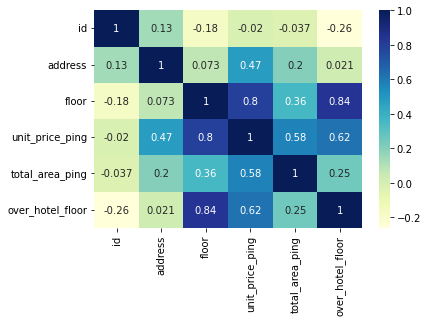

In [13]:
sns.heatmap(df_clean_scale.corr(),cmap='YlGnBu',annot=True,)

In [14]:
price_dataset = df_clean_scale.copy()
x = price_dataset.loc[:,['address','floor','total_area_ping','over_hotel_floor']]
y = price_dataset['unit_price_ping']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [24]:
# 訓練模型
linearModel = LinearRegression()
linearModel.fit(X_train, y_train)
y_pred = linearModel.predict(X_test)

In [25]:
print('Mean Squred Error:',mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Squred Error: 0.01666472611527841
Mean Absolute Error: 0.08246521396539556
R2 Score: 0.705549282372844


In [26]:
linearModel.coef_


array([ 0.21527308,  0.67005486,  0.82436881, -0.04223333])

In [27]:
linearModel.intercept_

-0.19345887095369907

<AxesSubplot:xlabel='id', ylabel='unit_price_ping'>

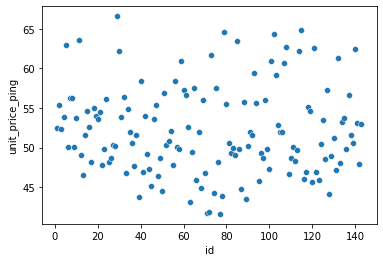

In [61]:
sns.scatterplot(data=df_clean, x='id', y='unit_price_ping')

<AxesSubplot:xlabel='id', ylabel='unit_price_ping'>

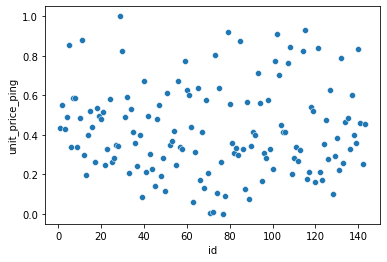

In [56]:
sns.scatterplot(data=df_clean_scale, x='id', y='unit_price_ping')